In [1]:
from swift_control.data import (
    create_grid_data,
    training_data_gen,
    xdot_training_data_gen,
)
from swift_control.eval import eval_cs
from swift_control.train import train_episodic
from plant_factory import ControllerFactory
import numpy as np
import mosek

In [2]:
swift_path = "/share/dean/fast_control/models/swift_grid/"
plant_conf = swift_path + "base_config.toml"

x_0 = np.array([3.0, 0.0, 0.0, 0.0])

plant = ControllerFactory(plant_conf)
kwargs = x_0, plant.episodic_T, plant.episodic_num_steps

oracle_cs, ts = eval_cs(plant.system, plant.oracle_controller, *kwargs)
qp_cs, _ = eval_cs(plant.system, plant.qp_controller, *kwargs)

c_cdot = 1

In [3]:
# confs = []
# gp_controller_pair = []
# gp_cs = []
# names = []
# for i in range(1,5):
#     model_conf = swift_path + f"m{i}_config.toml"
#     gp_controller, gp = train_episodic(plant, model_conf, x_0)
#     model_cs, _ = eval_cs(plant.system, gp_controller, *kwargs)

#     confs.append(model_conf)
#     gp_controller_pair.append((gp_controller, gp))
#     gp_cs.append(model_cs)
#     names.append(gp_controller.name)

<Axes: >

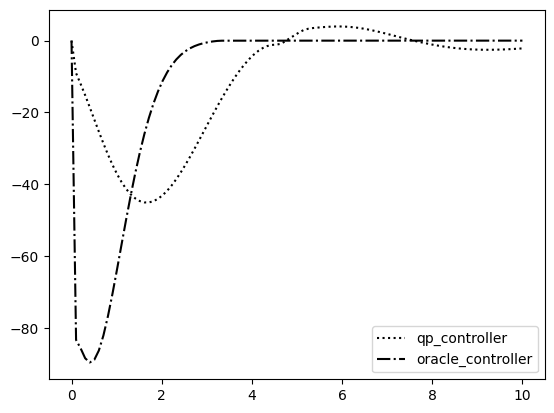

In [4]:
import seaborn as sns

sns.lineplot(
    x=ts,
    y=qp_cs[c_cdot],
    linestyle="dotted",
    color="black",
    label="qp_controller",
)
sns.lineplot(
    x=ts,
    y=oracle_cs[c_cdot],
    linestyle="dashdot",
    color="black",
    label="oracle_controller",
)
# for model_cs, name in zip(gp_cs, names):
#     sns.lineplot(
#         x=ts,
#         y=model_cs[c_cdot],
#         label=name,
#         alpha=0.5,
#     )

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
def plotit(ts, qp_cs, oracle_cs, gp_cs, names, c_cdot, plot_path, x_test):
    sns.lineplot(
        x=ts,
        y=qp_cs[c_cdot],
        linestyle="dotted",
        color="black",
        label="qp_controller",
    )
    sns.lineplot(
        x=ts,
        y=oracle_cs[c_cdot],
        linestyle="dashdot",
        color="black",
        label="oracle_controller",
    )
    for model_cs, name in zip(gp_cs, names):
        sns.lineplot(
            x=ts,
            y=model_cs[c_cdot],
            label=name,
            alpha=0.5,
        )
    plt.xlabel("time")
    plt.text(0, 0, x_test)
    # plt.ylabel(f"{name}")
    plt.tight_layout()
    plt.legend()
    plt.savefig(plot_path + f"{int(time.time())}", dpi=300, format="pdf")
    plt.show()
    plt.close()  

/home/kk983/.local/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


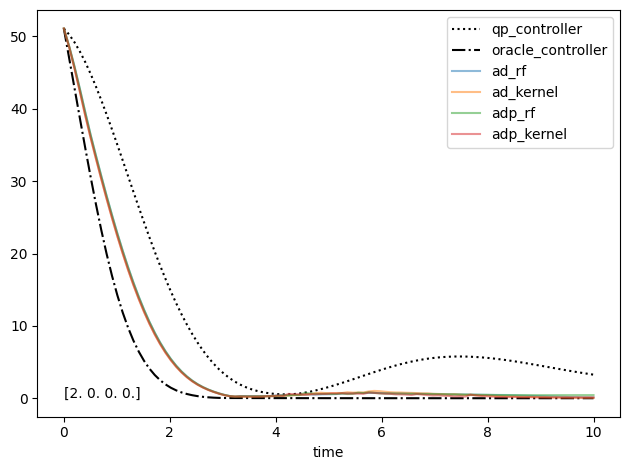

/home/kk983/.local/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


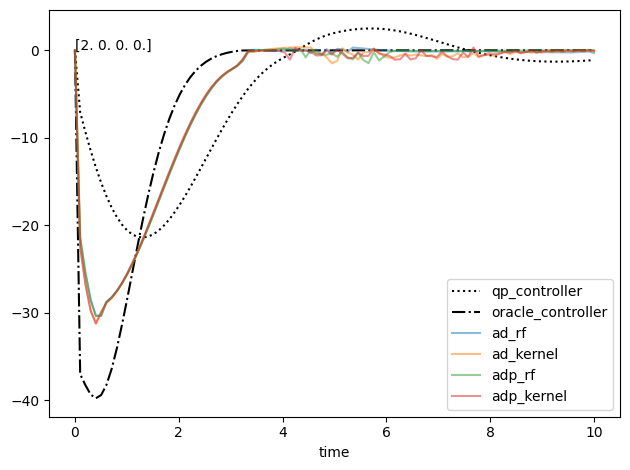

In [6]:
import numpy as np
swift_path = "/share/dean/fast_control/models/swift_grid/"
plot_path = swift_path + "warm_episodic/linear_static_cost/"
qp_cs = np.load(plot_path + "qp_cs.npy")
x_0 = np.array([2.0, 0.0, 0.0, 0.0])
kwargs = x_0, plant.episodic_T, plant.episodic_num_steps
oracle_cs, ts = eval_cs(plant.system, plant.oracle_controller, *kwargs)
gp_cs = np.load(plot_path + "gp_cs.npy")
names = ['ad_rf','ad_kernel','adp_rf','adp_kernel']

plotit(ts, qp_cs, oracle_cs, gp_cs, names, 0, plot_path, x_0)
plotit(ts, qp_cs, oracle_cs, gp_cs, names, 1, plot_path, x_0)